#Lab I - Dimensionality Reduction

### PUNTO 1

Simulate any random rectangular matrix A.
- What is the rank and trace of A?
- What is the determinant of A?
- Can you invert A? How?
- How are eigenvalues and eigenvectors of A’A and AA’ related? What interesting differences can you notice between both?
- See [https://sites.cs.ucsb.edu/~mturk/Papers/jcn.pdf]

In [2]:
#Punto 1.1
# Simulación de una matriz rectangular aleatoria de tamaño 4x3
import numpy as np
A = np.random.rand(4, 3)

# Imprimir la matriz A
print("Matriz A:\n", A)

# Calcular el rango de la matriz A
# El rango es la submatriz cuadrada mas grande que podamos obtener 
# de la matriz original, creo que tambien es igual al numero de filas
rango_A = np.linalg.matrix_rank(A)
print("Rango de A:", rango_A)

# Calcular la traza de la matriz A

#La traza es la suma de la diagonal de la matriz
traza_A = np.trace(A)
print("Traza de A:", traza_A)

Matriz A:
 [[0.73956367 0.33316312 0.8643716 ]
 [0.16885624 0.87941323 0.55132599]
 [0.29605228 0.5450583  0.35224591]
 [0.38601875 0.92592925 0.43801546]]
Rango de A: 3
Traza de A: 1.971222806795128


In [ ]:
#Punto 1.2
# Calcular el determinante de la matriz A
#Si el determinante es 0 estamos frente a una matriz singular,
#si es diferente de 0 es una matriz no singular,
#Solo se calcula para matrices cuadradas

#ya que no es una matriz cuadrada entonces cogere de manera arbitraria una submatriz,
#de dimension 3 x 3

# Tomare las primeras tres filas y columnas de A para obtener una submatriz cuadrada de tamaño 3x3
submatrix = A[:3, :3]

# Calcular el determinante de la submatriz
det_submatrix = np.linalg.det(submatrix)

# Imprimir el determinante de la submatriz
print("El determinante de la submatriz es:", det_submatrix)

El determinante de la submatriz es: 0.36176050362001194


In [ ]:
#Punto 1.3
#Dado que no es una matriz cuadrada no se puede invertir, pero se puede tener una 
#solucion aproximada con el metodo SVD (DESCOMPOSICION DE VALORES SINGULARES)

#A^+ = V*D^+*U^T
#donde U, D, V son las matrices resultantes de la descomposición SVD de A,
#y D^+ es la "pseudoinversa" de la matriz diagonal D

# Calculamos la pseudoinversa de A utilizando SVD
A_pinv = np.linalg.pinv(A)

# Imprimimos la matriz A y su pseudoinversa
print("Matriz A:")
print(A)
print("Pseudoinversa de A:")
print(A_pinv)

Matriz A:
[[0.49979652 0.98397051 0.87400828]
 [0.35105484 0.02572031 0.74535319]
 [0.77568571 0.53408116 0.46487671]
 [0.0142142  0.10392172 0.00645531]]
Pseudoinversa de A:
[[-1.055742    0.01301583  1.96552235 -0.10839148]
 [ 1.11904395 -1.20068731 -0.18243046  0.26181702]
 [ 0.47526047  1.35848985 -0.91896292 -0.11337667]]


In [3]:
#Punto 1.4
# Calculamos la SVD de A
U, S, Vt = np.linalg.svd(A)

# Calculamos A'A y AA'
ATA = np.dot(A.T, A)
AAT = np.dot(A, A.T)

# Calculamos los valores propios y vectores propios de A'A
eigvals_ATA = S**2
eigvecs_ATA = Vt.T

# Calculamos los valores propios y vectores propios de AA'
eigvals_AAT = S**2
eigvecs_AAT = U

# Imprimimos los resultados
print("Valores propios y vectores propios de A'A:")
print("Valores propios:")
print(eigvals_ATA)
print("Vectores propios:")
print(eigvecs_ATA)
print("Valores propios y vectores propios de AA':")
print("Valores propios:")
print(eigvals_AAT)
print("Vectores propios:")
print(eigvecs_AAT)


Valores propios y vectores propios de A'A:
Valores propios:
[3.73171935 0.45473751 0.03149957]
Vectores propios:
[[-0.41865477  0.55863351 -0.71600055]
 [-0.69710376 -0.70299313 -0.14087937]
 [-0.5820434   0.44014686  0.68373695]]
Valores propios y vectores propios de AA':
Valores propios:
[3.73171935 0.45473751 0.03149957]
Vectores propios:
[[-0.5409418   0.82952548  0.08191857  0.11206601]
 [-0.52005806 -0.41704089  0.74469646  0.03230625]
 [-0.36698459 -0.09305006 -0.26998648 -0.88530859]
 [-0.54976713 -0.35959152 -0.60483372  0.45014022]]


####**Observaciones:**

Observamos que los eigen valores son iguales en ambas multiplicaciones, pero para los eigen vectores no son iguales, esto ocurre pq las matrices tienen diferente dimension, vemos ATA  es cuadrada y AAT es rectangular, por lo cual no nos dara eigen vectores iguales, puede darse el caso que si ambas matrices fueran cuadradas existe la posibilidad de que sean iguales


### PUNTO 2

Add a steady, well-centered picture of your face to a shared folder alongside your classmates.
- Edit your picture to be 256x256 pixels, grayscale (single channel)
- Plot your edited face
- Calculate and plot the average face of the cohort.
- How distant is your face from the average? How would you measure it?

In [4]:
#Punto 2.1
import os
import cv2

folder_path = "./drive/MyDrive/Imagenes_rostros/"
image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.jpeg')]

image = []
labels = []

for filename in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, filename), cv2.IMREAD_COLOR)
    image.append(img)

image_original = image

for i in range(len(image)):
    image[i] = cv2.resize(image[i], (256, 256))

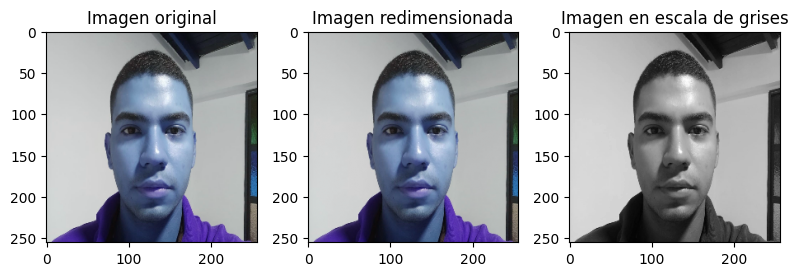

In [5]:
#Punto 2.2
# Mostramos las imágenes originales y editadas
from skimage import io, color, transform
import matplotlib.pyplot as plt

image_propia = image_original[13]

# Redimensionamos la imagen a 256x256 píxeles
image_resized = transform.resize(image_propia, (256, 256))

# Convertimos la imagen a escala de grises
image_gray = color.rgb2gray(image_resized)

#Punto 2.2
# Mostramos las imágenes originales y editadas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))
axes[0].imshow(image_propia, cmap='gray')
axes[0].set_title('Imagen original')
axes[1].imshow(image_resized, cmap='gray')
axes[1].set_title('Imagen redimensionada')
axes[2].imshow(image_gray, cmap='gray')
axes[2].set_title('Imagen en escala de grises')
plt.tight_layout()
plt.show()

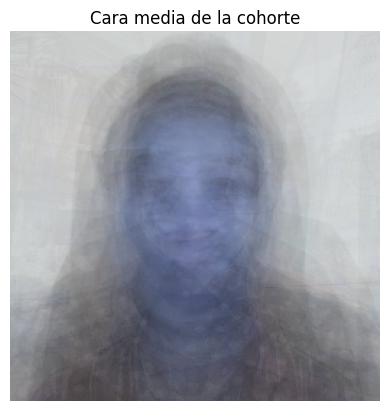

In [6]:
#Punto 2.3

# Calculamos la media de todas las imágenes del conjunto de datos
mean_face = np.mean(image, axis=0)

# Convertir la imagen a escala de grises
mean_face = mean_face.astype('uint8')

# Mostrar la cara media
plt.imshow(mean_face, cmap='gray')
plt.title('Cara media de la cohorte')
plt.axis('off')
plt.show()


In [ ]:
#Punto 2.4

#usaremos la distancia euclidiana que es igual a la raíz cuadrada de la suma
#de los cuadrados de las diferencias entre los píxeles de las dos imágenes.

from scipy.spatial.distance import euclidean

# Calculamos la distancia Euclidiana entre la imagen de mi cara y la cara media
distance = euclidean(image_propia.flatten(), mean_face.flatten())
print("La distancia entre mi cara y la media es:", distance)


La distancia entre mi cara y la media es: 69078.68227608284


### PUNTO 3

##Importamos nuestras librerias del paquete "unsupervised"

In [29]:
!unzip unsupervised.zip

Archive:  unsupervised.zip
   creating: unsupervised/
  inflating: unsupervised/.gitignore  
  inflating: unsupervised/base.py    
  inflating: unsupervised/pca.py     
  inflating: unsupervised/svd.py     
  inflating: unsupervised/taller machine learning.py  
  inflating: unsupervised/taller_ML_2.ipynb  
  inflating: unsupervised/tsne.py    
 extracting: unsupervised/__init__.py  
   creating: unsupervised/__pycache__/
  inflating: unsupervised/__pycache__/base.cpython-38.pyc  
  inflating: unsupervised/__pycache__/svd.cpython-38.pyc  
  inflating: unsupervised/__pycache__/__init__.cpython-38.pyc  


In [30]:
from unsupervised import pca
from unsupervised import svd
from unsupervised import tsne

###PUNTO 4

Apply SVD over the picture of your face, progressively increasing the number of singular values used. Is
there any point where you can say the image is appropriately reproduced? How would you quantify how
different your photo and the approximation are?

##Aplicacion SVD con paquete "unsupervised"


Diferencia: 1.3583773463509504e-11


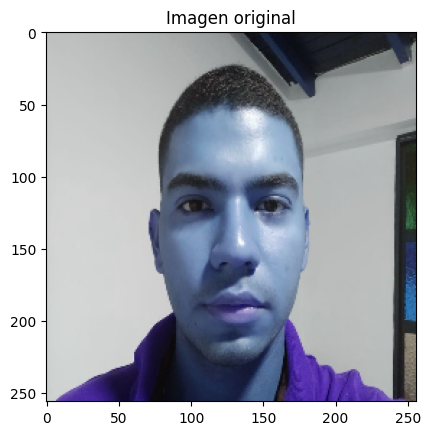

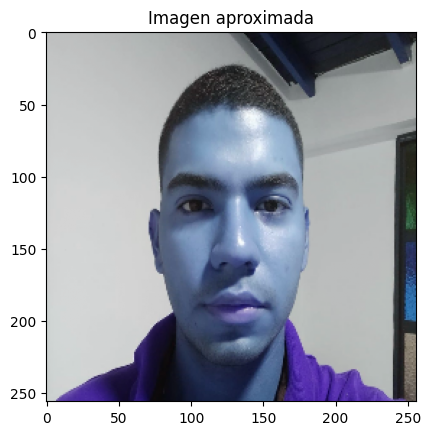

In [31]:
from unsupervised import svd
from matplotlib.colors import Normalize

# Obtener la imagen número 13 (mi cara)
X = image[13]

# Aplicar SVD
svd = svd.SVD(full_matrices=False)
X_reduced = svd.fit_transform(X.reshape(1, -1))

# Reconstrucción aproximada
n_components = 10
X_approx = (svd.U[:, :n_components] @ np.diag(svd.s[:n_components]) @ svd.Vt[:n_components, :]).reshape(X.shape)

# Calcular la diferencia entre la imagen original y la aproximación
diff = np.linalg.norm(X - X_approx)

print(f"Diferencia: {diff}")

# Graficar la imagen original
plt.imshow(X)
plt.title('Imagen original')
plt.show()

# Graficar la imagen aproximada
X_norm = Normalize()(X_approx.reshape(X.shape))
plt.imshow(X_norm, vmin=0, vmax=1)
plt.title('Imagen aproximada')
plt.show()

## Aplicacion con paquete numpy-linalg

Diferencia para 10 valores singulares: 4.214981117356383e-12


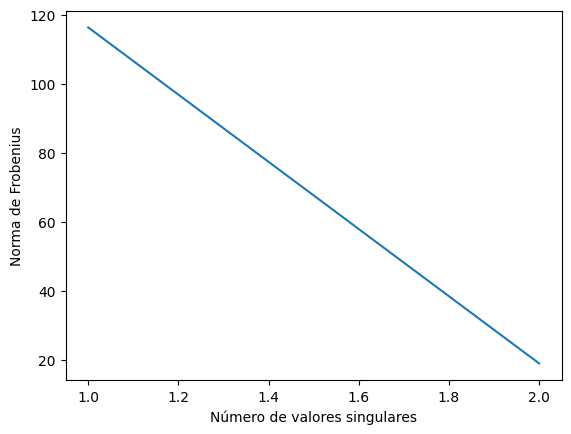

In [33]:
#Punto 4
# Seleccionamos la imagen número 13 de la lista
image = image[13]
#Punto 4

#Primero se descompone la matriz de la imagen seleccionada
# Descomposición SVD
U, S, VT = np.linalg.svd(image, full_matrices=False)

#Luego, podemos reconstruir la imagen utilizando los valores singulares
#aumentando gradualmente el número de valores singulares utilizados:
# Número de valores singulares a utilizar
n = 10

# Reconstrucción de la imagen utilizando los n primeros valores singulares
image_approx = U[:,:n] @ np.diag(S[:n]) @ VT[:n,:]

#Para cuantificar las diferencias, podemos calcular la norma de 
#Frobenius entre la imagen original y la aproximación:
    
diff_norm = np.linalg.norm(image - image_approx, ord='fro')
print(f"Diferencia para {n} valores singulares: {diff_norm}")
  
#Podemos repetir este proceso para diferentes valores de n y graficar la norma 
#de Frobenius en función del número de valores singulares utilizados. 
#El punto en el que la norma de Frobenius alcanza un mínimo puede ser considerado 
#como el punto en el que la imagen se reproduce adecuadamente.

# Número máximo de valores singulares a utilizar
max_n = min(image.shape)

# Lista para almacenar las normas de Frobenius
diff_norms = []

# Recorremos los valores de n
for n in range(1, max_n):
    # Reconstrucción de la imagen utilizando los n primeros valores singulares
    image_approx = U[:,:n] @ np.diag(S[:n]) @ VT[:n,:]
    # Norma de Frobenius entre la imagen original y la aproximación
    diff_norm = np.linalg.norm(image - image_approx, ord='fro')
    diff_norms.append(diff_norm)

# Gráfico de la norma de Frobenius en función del número de valores singulares utilizados
plt.plot(range(1, max_n), diff_norms)
plt.xlabel('Número de valores singulares')
plt.ylabel('Norma de Frobenius')
plt.show()

Segun la norma de Frobenius el numero de valores singulares con el cual se reproduce la imagen de una manera aproxiamda y correcta es 2

# PUNTO 5

Train a naive logistic regression on raw MNIST images to distinguish between 0s and 8s. We are calling
this our baseline. What can you tell about the baseline performance?



In [34]:
#Cargamos la base de datos
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Cargamos los datos de MNIST
mnist = fetch_openml('mnist_784')

# Filtramos los ejemplos que corresponden a los dígitos 0 y 8
X = mnist.data[(mnist.target == '0') | (mnist.target == '8')]
y = mnist.target[(mnist.target == '0') | (mnist.target == '8')]

# Convertimos las etiquetas a valores binarios
y = (y == '8').astype(int)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

# Creamos un modelo de regresión logística
model = LogisticRegression(penalty='none',max_iter=1000)

# Entrenamos el modelo en los datos de entrenamiento
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

# Predecimos las etiquetas de los datos de prueba
y_pred = model.predict(X_test)

# Calculamos la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)

print("Exactitud de la línea de base: {:.2f}%".format(accuracy*100))


/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Exactitud de la línea de base: 98.65%


### PUNTO 6
Now, apply dimensionality reduction using all your algorithms to train the model with only 2 features per
image.
- Plot the 2 new features generated by your algorithm
- Does this somehow impact the performance of your model?

In [37]:
from unsupervised import pca
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [45]:
# Get Mnist
from unsupervised import pca
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [56]:
# Get Mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# build masks 
masktrain = (y_train == 0) | (y_train == 8)
masktest = (y_test == 0) | (y_test == 8)
# Apply masks
X_train = X_train[masktrain]/255.0
y_train = y_train[masktrain]
X_test = X_test[masktest]/255.0
y_test = y_test[masktest]

X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1]* X_train.shape[2])   
X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1]* X_test.shape[2])  

In [ ]:
# create a PCA object with 2 components
from unsupervised import pca
pca = pca.PCA(n_components=2)
# fit the data
pca.fit(X_train)
# transform the data using the PCA object
reduced_x_train = pca.transform(X_train)
print(reduced_x_train.shape)
reduced_x_train = np.real(reduced_x_train)

### PUNTO 7
Repeat the process above but now using the built-in algorithms in the Scikit-Learn library. How different
are these results from those of your implementation? Why?


/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


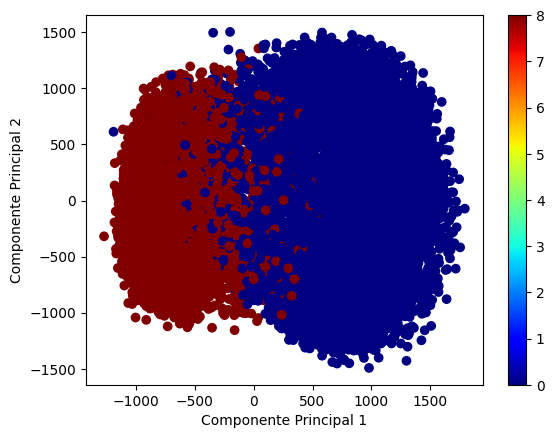

In [ ]:
from sklearn.decomposition import PCA
mnist = fetch_openml('mnist_784')

X = mnist.data[(mnist.target == '0') | (mnist.target == '8')]
y = mnist.target[(mnist.target == '0') | (mnist.target == '8')]
y = y.astype(int)

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualización con scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='jet')
plt.colorbar()
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

### PUNTO 8

What strategies do you know (or can think of) in order to make PCA more robust? (Bonus points for
implementing them)
[https://nbviewer.org/github/fastai/numerical-linear-algebra/blob/master/nbs/3.%20Background%20Remov
al%20with%20Robust%20PCA.ipynb]


####**1 ESTRATEGIA:**

**Escalar los datos:** antes de aplicar PCA, es importante escalar los datos para 
que todas las características tengan una media de cero y una varianza unitaria. 
Esto puede ayudar a garantizar que las características con mayores varianzas 
no dominen la variabilidad en el análisis de componentes principales.

####**2 ESTRATEGIA:**

**Eliminar valores atípicos:** los valores atípicos pueden tener un gran impacto 
en los resultados de PCA, especialmente en conjuntos de datos pequeños. 
Por lo tanto, es importante detectar y eliminar los valores atípicos antes de aplicar PCA.

####**3 ESTRATEGIA:**

**Utilizar métodos de PCA robustos:** existen varios métodos de PCA que son más robustos 
que el método estándar, como la PCA robusta, la PCA de alta dimensión y la PCA 
incremental. Estos métodos pueden manejar mejor los datos ruidosos y los valores atípicos. 


#### PUNTO 9
What are the underlying mathematical principles behind UMAP? What is it useful for?

**UMAP:** es una técnica de reducción de dimensionalidad no lineal que utiliza principios matemáticos de grafos, geometría diferencial y topología algebraica para proyectar datos de alta dimensión en un espacio de menor dimensión, preservando las relaciones espaciales entre los datos

Respecto a sus principios matematicos estos son: 

**1) Teoría de grafos:** En UMAP, la teoría de grafos se utiliza para construir un grafo de vecindades en el espacio de alta dimensión. Este grafo es un conjunto de nodos (datos) conectados por aristas, donde las aristas representan las relaciones de vecindad entre los datos.
En términos matemáticos, un grafo se representa por medio de una tupla G = (V, E), donde V es el conjunto de vértices o nodos y E es el conjunto de aristas o conexiones entre los nodos. En UMAP, el grafo se construye utilizando una medida de distancia entre los datos y un umbral de distancia para determinar las conexiones entre los nodos.

**2) Geometría diferencial:** En UMAP, la geometría diferencial se utiliza para medir las distancias entre los datos en el espacio de alta dimensión y en la proyección de baja dimensión. En particular, se utiliza una métrica no euclidiana llamada distancia de geodésica para medir las distancias en la proyección de baja dimensión.
En términos matemáticos, la geometría diferencial estudia las propiedades geométricas de los objetos en el espacio que no cambian bajo transformaciones continuas. En UMAP, se utilizan técnicas de geometría diferencial para medir las distancias entre los datos y encontrar la proyección de baja dimensión que mejor preserva las relaciones de vecindad entre los datos.

**3) Topología algebraica:** En UMAP, la topología algebraica se utiliza para analizar la estructura topológica del grafo de vecindades en el espacio de alta dimensión. En particular, se utiliza una técnica llamada persistencia homológica para identificar características topológicas importantes del grafo, como agujeros y cavidades.
En términos matemáticos, la topología algebraica estudia las propiedades topológicas de los objetos utilizando herramientas de álgebra. En UMAP, se utilizan técnicas de topología algebraica para analizar la estructura topológica del grafo de vecindades y encontrar la proyección de baja dimensión que mejor preserva esta estructura.

### PUNTO 10
What are the underlying mathematical principles behind LDA? What is it useful for?


**LDA:**el LDA es una técnica de aprendizaje automático supervisado que utiliza una transformación lineal de los datos para reducir la dimensionalidad y maximizar la separación entre las clases. Se utiliza comúnmente en problemas de clasificación de patrones y análisis de datos biomédicos.


**Principios matemáticos subyacentes al LDA**: El LDA es una técnica de aprendizaje automático supervisado utilizada para clasificar objetos en diferentes grupos. El LDA se basa en la reducción de la dimensionalidad de los datos mediante una transformación lineal que maximiza la separación entre las clases y minimiza la varianza dentro de las clases.
En términos matemáticos, el LDA utiliza una combinación lineal de las variables originales para proyectar los datos en un espacio de menor dimensión. El objetivo es encontrar una proyección que maximice la separación entre las clases y minimice la varianza dentro de cada clase. Este problema se puede formular como un problema de optimización con restricciones, utilizando técnicas de álgebra lineal y cálculo.